In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('../../data/raw_data/train.csv')

## Anlysis and cleaning

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

**NaN values**:

Cabin: replace NaN with 'X'

Age: get the mean of the age 

Embarked: replace NaN with the most common value

In [6]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
train_data.fillna({'Cabin':'X'}, inplace=True)
train_data.fillna({'Age': train_data['Age'].mean()}, inplace=True)
train_data.fillna({'Embarked':'S'}, inplace=True)


In [8]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data['Cabin'].unique()

array(['X', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
#train_data['Cabin'].replace(['D', 'T'], 'X', inplace=True)
train_data['Cabin'] = train_data['Cabin'].replace('F G73', 'G73')
train_data['Cabin'] = train_data['Cabin'].replace('F E69', 'E69')
train_data['Cabin'] = train_data['Cabin'].replace('F G63', 'G63')

In [12]:
train_data['Cabin'].unique()

array(['X', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'G63',
       'C62 C64', 'E24'

we will use only the cabin letter.

In [13]:
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0])

In [14]:
train_data['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Impact of the features on the survival rate

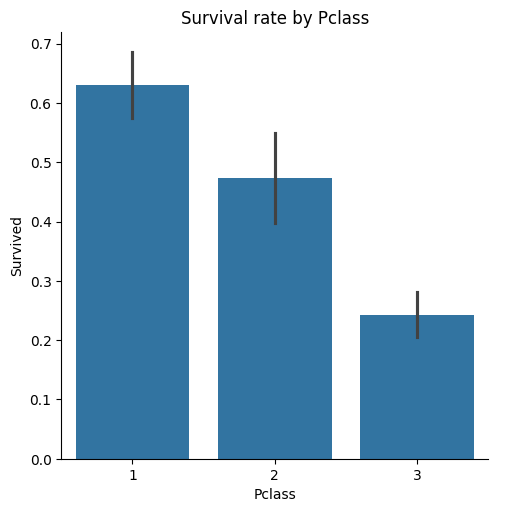

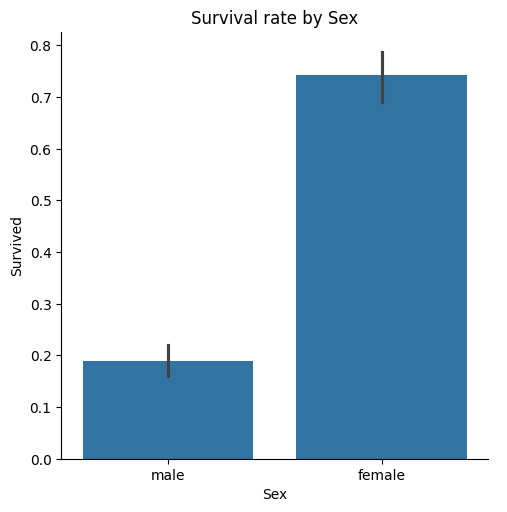

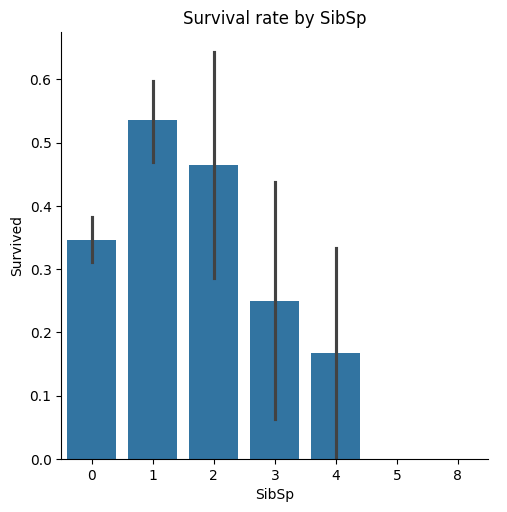

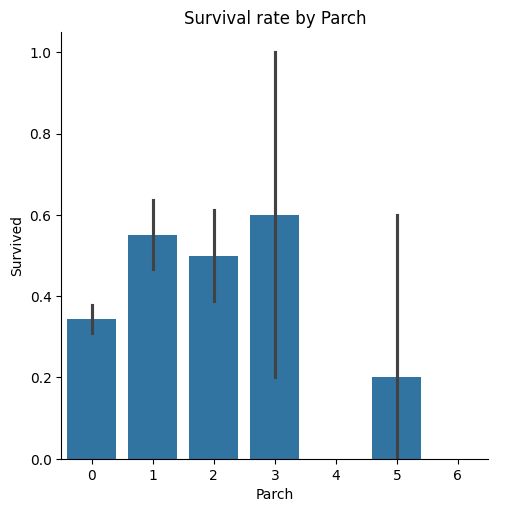

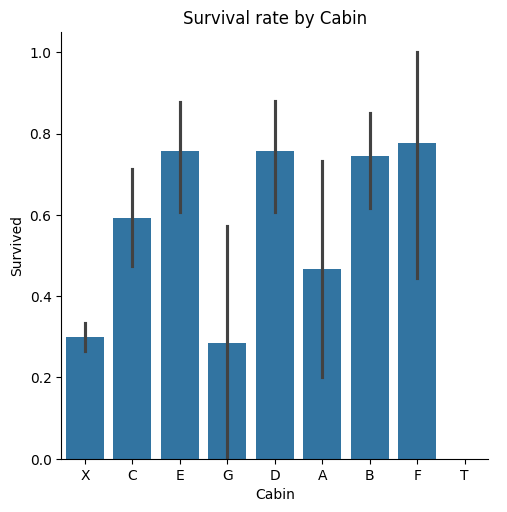

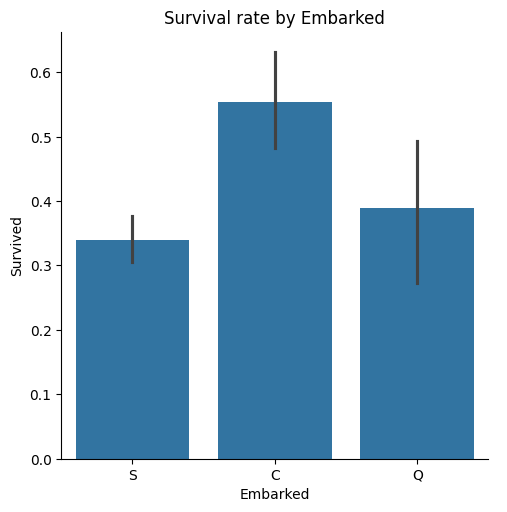

In [15]:
# For categorical variables
categorical_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

for var in categorical_vars:
    sns.catplot(x=var, y="Survived", data=train_data, kind="bar")
    plt.title('Survival rate by {}'.format(var))
    plt.show()

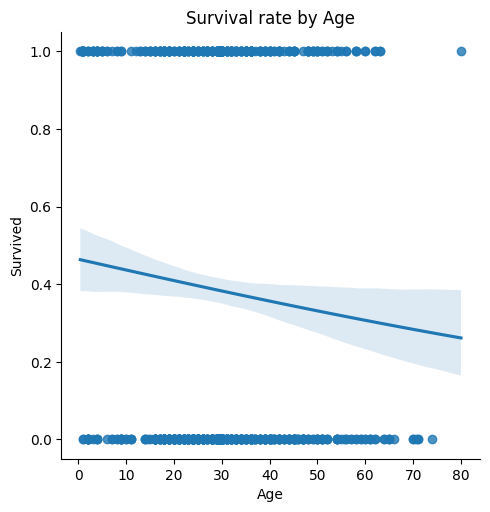

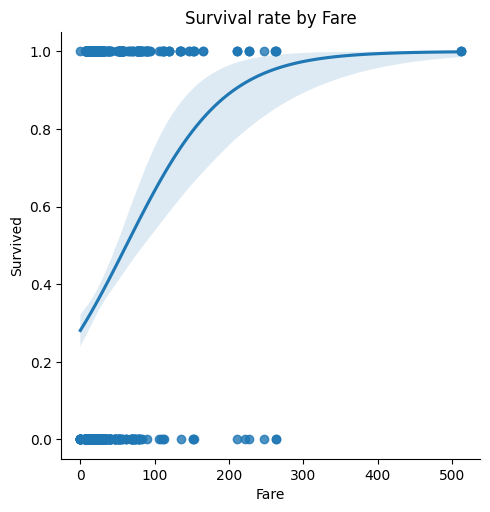

In [16]:
# For numerical variables
numerical_vars = ['Age', 'Fare']

for var in numerical_vars:
    sns.lmplot(x=var, y="Survived", data=train_data, logistic=True)
    plt.title('Survival rate by {}'.format(var))
    plt.show()

## Feature engineering

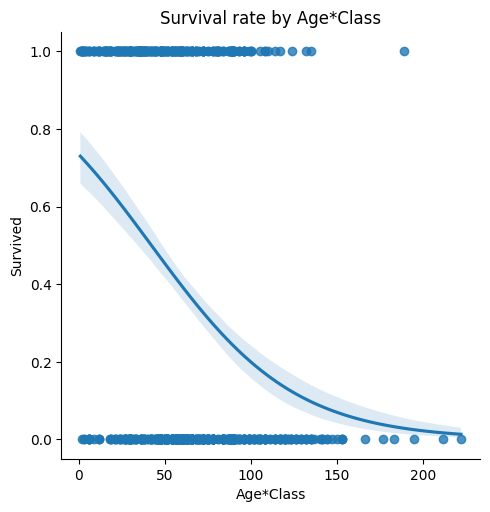

In [17]:
train_data['Age*Class'] = train_data['Age'] * train_data['Pclass']
var = 'Age*Class'
sns.lmplot(x=var, y="Survived", data=train_data, logistic=True)
plt.title('Survival rate by {}'.format(var))
plt.show()

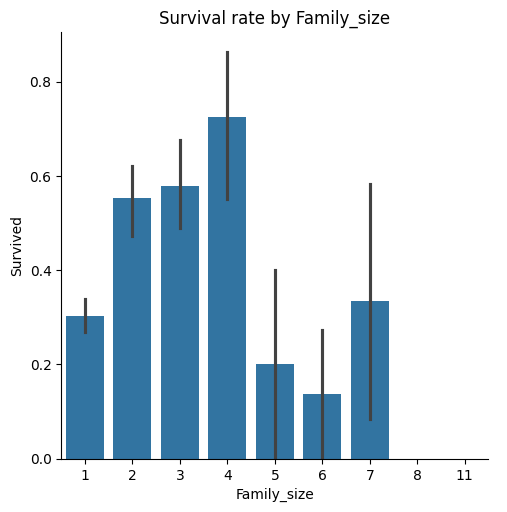

In [18]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1 # 1 for self
var = 'Family_size'
sns.catplot(x=var, y="Survived", data=train_data, kind="bar")
plt.title('Survival rate by {}'.format(var))
plt.show()

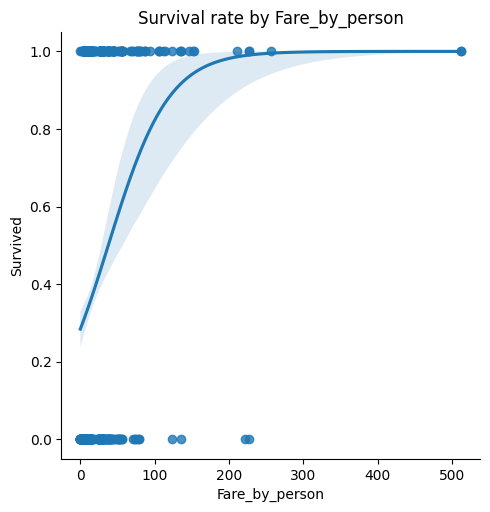

In [19]:
train_data['Fare_by_person'] = train_data['Fare'] / train_data['Family_size']
var = 'Fare_by_person'
sns.lmplot(x=var, y="Survived", data=train_data, logistic=True)
plt.title('Survival rate by {}'.format(var))
plt.show()

In [20]:
# we'll not use Name and Ticket
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

# age and class are together in Age*Class
train_data.drop(['Age', 'Pclass'], axis=1, inplace=True)

# SibSp and Parch are together in Family_size
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [21]:
# now we have to do the encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Cabin', 'Embarked'])
                            

In [22]:
train_data.head()

,PassengerId,Survived,Fare,Age*Class,Family_size,Fare_by_person,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,1,0,7.2500,66.0,2,3.62500,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1,2,1,71.2833,38.0,2,35.64165,True,False,False,False,True,False,False,False,False,False,False,True,False,False
2,3,1,7.9250,78.0,1,7.92500,True,False,False,False,False,False,False,False,False,False,True,False,False,True
3,4,1,53.1000,35.0,2,26.55000,True,False,False,False,True,False,False,False,False,False,False,False,False,True
4,5,0,8.0500,105.0,1,8.05000,False,True,False,False,False,False,False,False,False,False,True,False,False,True


In [23]:
train_data.to_csv('../../data/processed_data/train.csv', index=False)

In [24]:
# cleaning test data
test_data = pd.read_csv('../../data/raw_data/test.csv')

In [25]:
test_data.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [26]:
# Only the letter of the cabin 
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'X')
# Age missing values are filled with the mean
test_data.fillna({'Age': test_data['Age'].mean()}, inplace=True)

# Creating the same features as in the training data
test_data['Age*Class'] = test_data['Age'] * test_data['Pclass']
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Fare_by_person'] = test_data['Fare'] / test_data['Family_size']

# Dropping the columns that are not used
test_data.drop(['Name', 'Ticket', 'Age', 'Pclass', 'SibSp', 'Parch'], axis=1, inplace=True)

# Encoding the categorical variables
test_data = pd.get_dummies(test_data, columns=['Sex', 'Cabin', 'Embarked'])

# Saving the processed data
test_data.to_csv('../../data/processed_data/test.csv', index=False)